In [256]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [272]:
data_prefix = '/data/zhenyus/webcachesim/ats_log'
sleep_time = 15.
max_log2_client = 8
n_client = 256
size = '128G'
# algs = ['fifo', 'lru', 'random', 'gbdt']
# algs = ['fifo']
algs = ['fifo', 'gbdt']
unit = 'm' 
mean = 0

In [281]:
records = []
for alg in algs:
    byte_miss = []
    if alg == 'gbdt':
        with open(f'{data_prefix}/byte_miss_{unit}_{alg}_{size}_{mean}_size0.log') as f:
            for line in f:
                line.split()
                byte_miss.append(int(line.split()[1]))
    else:
        with open(f'{data_prefix}/byte_miss_{unit}_{alg}_{size}_{mean}.log') as f:
            for line in f:
                line.split()
                byte_miss.append(int(line.split()[1]))
    
    records.append({
        'algorithm': alg,
        'cache_size': 'size',
        'traffic': byte_miss[-1]-byte_miss[-2],
    })

In [282]:
records

[{'algorithm': 'fifo', 'cache_size': 'size', 'traffic': 5656750393369},
 {'algorithm': 'gbdt', 'cache_size': 'size', 'traffic': 4083819102988}]

In [283]:
df = pd.DataFrame(records)
df.traffic /= 2**30

In [284]:
df.traffic

0    5268.259340
1    3803.352921
Name: traffic, dtype: float64

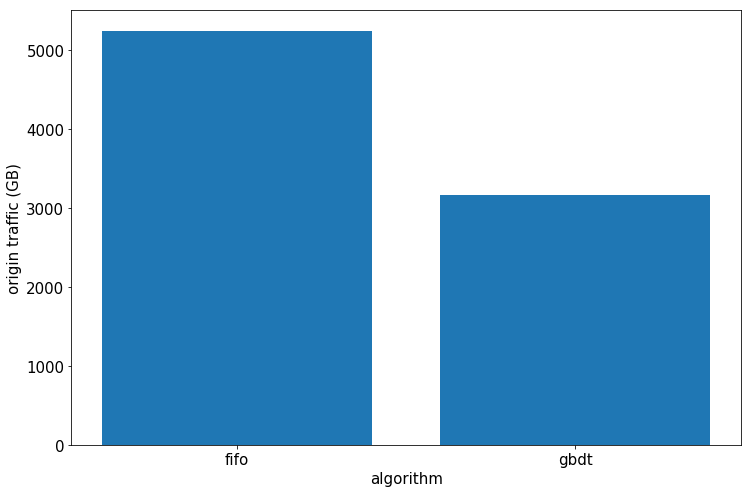

In [265]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df))
plt.bar(x, df.traffic)
plt.xticks(x, df.algorithm)
# df.plot.bar(x='cache_size', y='traffic', ax=ax)
# plt.title('bandwidth')
plt.xlabel('algorithm')
plt.ylabel('origin traffic (GB)')
plt.show()

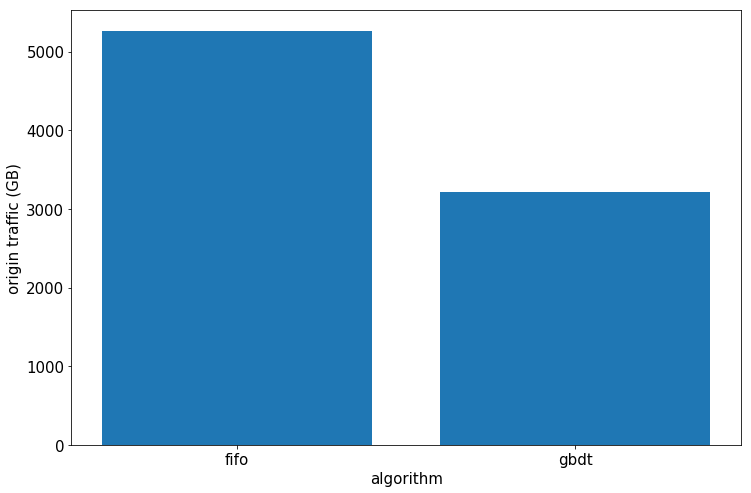

In [246]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df))
plt.bar(x, df.traffic)
plt.xticks(x, df.algorithm)
# df.plot.bar(x='cache_size', y='traffic', ax=ax)
# plt.title('bandwidth')
plt.xlabel('algorithm')
plt.ylabel('origin traffic (GB)')
plt.show()